### IS727272 - Cordero Hernández, Marco Ricardo

## Banknote dataset

Obtain the Accuracy, the Specificity and Sensitivity, the ROC Curve, AUC, and Confusion Matrix for the Banknote dataset.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 1. Load dataset
data = pd.read_csv('./Datasets/data_banknote_authentication.csv', header = None)
data.head()

dataset = np.array(data)
m, n = np.shape(dataset)
print('Rows:', m, 'Columns:', n)

x = dataset[:, : n - 1]
y = dataset[:, -1]
y = y.reshape(-1, 1)
print('x:', np.shape(x))
print('y:', np.shape(y))

Rows: 1372 Columns: 5
x: (1372, 4)
y: (1372, 1)


In [3]:
# Normalize
def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / np.std(x,axis=0)
    return x_norm

X_norm = normalize(x)

In [4]:
# 2. Prepare data: add Bias and split dataset

print(np.shape(X_norm))

def Bias(X):
    ones = np.ones((len(X),1))
    X1 = np.concatenate((ones, X), axis=1)
    return X1

x = Bias(X_norm)

print('x shape: ', np.shape(x))

test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))

(1372, 4)
x shape:  (1372, 5)
Split X 1372 rows into train with 1097 and test with 275
Split Y 1372 rows into train with 1097 and test with 275
xTrain shape: (1097, 5) yTrain shape: (1097, 1)
xTest shape: (275, 5) yTest shape: (275, 1)


In [5]:
# 3.1 Logistic function
def h(x, w):
    wx = np.dot(x, w.T)
    z = 1 / (1 + np.exp(-wx))
    return z

In [6]:
# 3.2 Cost function
def cost(x, y, w):
    m, n = np.shape(x)
    c = (-1 / m)*np.sum(y * np.log(h(x, w)) + (1 - y) * np.log((1 - h(x, w))))
    return c

In [7]:
# 3.3 Gradient function
def grad(x, y, w):
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T,(h(x, w)-y))
    return g

In [8]:
# 3.4 Gradient Descent function
def gd(x, y, w, alpha = 0.001, its = 1000):
    it = 0
    costo = 0
    J = {}
    while it < its:
        # Gradient
        gradiente = grad(x, y, w)
            
        # Cost function
        costo = cost(x, y, w)
            
        # Updating w
        w = w - alpha * gradiente.T
                
        # Storing cost
        J[it] = costo
   
        it += 1
              
    return w, J

Initial Cost (training data): 0.6931471805599453
Cost after training (training data): 0.08062053617951113
Cost after training (testing data): 0.08890997191082502
W: [[-0.74481665 -3.55171875 -2.90065918 -2.6934041   0.2494614 ]]


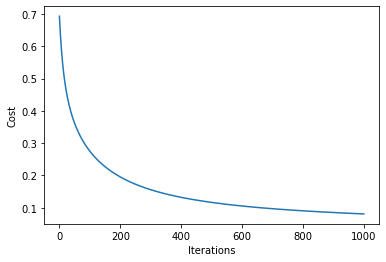

In [9]:
# Test the gradient descent
alpha = 0.1
its = 1000

m, n = np.shape(x)
w = np.zeros((1, n))

print('Initial Cost (training data):', cost(xTrain, yTrain, w))

# Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

# Plot the cost over the iterations
plt.plot(J.keys(), J.values())
plt.xlabel('Iterations')
plt.ylabel('Cost');

In [10]:
# 4.1 Accuracy

def accuracy(x, y, w):
    
    Ynew = list(map(lambda x: 1 if x >= 0.5 else 0, h(x, w)))
               
    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1,1)
    suma = (y == Ynew).sum()
    
    a = suma/len(y)
    
    return a, suma

accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))

Training accuracy: 0.9762989972652689 1071 out of 1097
Testing accuracy: 0.9781818181818182 269 out of 275


In [11]:
# 4.2 Obtain TPR and FPR

# a) Define the prediction function for a variable threshold
def predict(p, threshold):
    return list(map(lambda x: 1 if x >= threshold else 0, p))

# b) Define the values function, where you can count the tp, tn, fp, and fn
def values(y, pred):
    tp = tn = fn = fp = 0
    
    for i in range(len(y)):
        tp += 1 if (y[i] and pred[i]) else 0
        fp += 1 if (not y[i] and pred[i]) else 0
        tn += 1 if (not y[i] and not pred[i]) else 0
        fn += 1 if (y[i] and not pred[i]) else 0
    
    V = {'TP': tp, 'TN': tn, 'FN': fn, 'FP': fp}
    return V

# c) Define the TPR function
def tpr(V):
    return V['TP'] / (V['TP'] + V['FN'])

# d) Define the FPR function
def fpr(V):    
    return V['FP'] / (V['FP'] + V['TN'])

# Test your functions
pred = predict(h(x, w), 0.5)
Val = values(yTrain, pred)
print('Prediction shape: ', np.shape(pred))
print('Values: ',Val)

print('Sensitivity (TPR): %.2F'% tpr(Val), 'portion were correctly classified as TP')
print('FPR: %.2F'% fpr(Val), 'portion were classified as FP')

Prediction shape:  (1372,)
Values:  {'TP': 169, 'TN': 410, 'FN': 326, 'FP': 192}
Sensitivity (TPR): 0.34 portion were correctly classified as TP
FPR: 0.32 portion were classified as FP


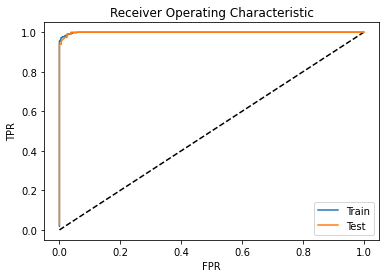

In [12]:
# p = h(x, w)
# i it's each threshold value

def ROC(y, p):
    thrs = np.arange(0, 1, 0.005)
    TPR = np.zeros(len(thrs))
    FPR = np.zeros(len(thrs))
    
    for i in range(len(thrs)):
        pred = predict(p, thrs[i])
        TPR[i] = tpr(values(y, pred))
        FPR[i] = fpr(values(y, pred))
    
    return TPR, FPR

#ROC curve for Training
Tpr, Fpr = ROC(yTrain, h(xTrain, w))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(Fpr, Tpr, '-', label = "Train")

#ROC curve for Testing
Tpr1, Fpr1 = ROC(yTest, h(xTest, w))
plt.plot(Fpr1, Tpr1, '-', label = "Test")

#Plot the curves
plt.xlabel('FPR')
plt.ylabel('TPR');
plt.legend()
plt.title('Receiver Operating Characteristic');

In [13]:
# AUC (Area under curve) calculus
rectangle_roc = 0 # Training
rectangle_roc1 = 0 # Testing

# AUC for Training
for i in range(len(Tpr) - 1):
    rectangle_roc += (Fpr[i] - Fpr[i + 1]) * Tpr[i]
else:
    print('AUC Training: ', rectangle_roc)

# AUC for Testing
for i in range(len(Tpr) - 1):
    rectangle_roc1 += (Fpr1[i] - Fpr1[i + 1]) * Tpr1[i]
else:
    print('AUC Testing: ', rectangle_roc1)

AUC Training:  0.9991878922111481
AUC Testing:  0.9990217391304347


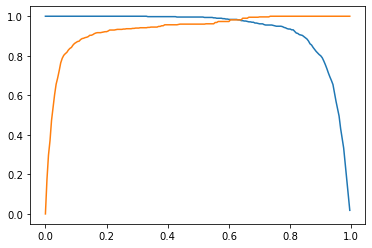

In [14]:
# Specificity and Sensitivity behaviour
thrs = np.arange(0, 1, 0.005)
plt.plot(thrs, Tpr)
plt.plot(thrs, 1 - Fpr)

In [15]:
from sklearn.metrics import confusion_matrix

pred = predict(h(xTrain, w), 0.5)
cm = confusion_matrix(yTrain, pred)
print(cm)

[[578  24]
 [  2 493]]


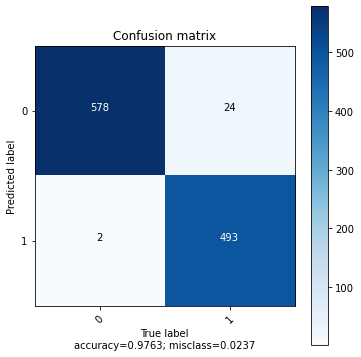

In [16]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(5, 5))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
# Testing the function
plot_confusion_matrix(values = cm, classes = ['0', '1'])